# K-Means Clustering

In [1]:
! pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.11.1)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style = "dark")

### Playing with iris dataset

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris_pie = iris.groupby("species", as_index = False)["petal_width"].mean()

In [6]:
iris_pie

,species,petal_width
0,setosa,0.246
1,versicolor,1.326
2,virginica,2.026


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

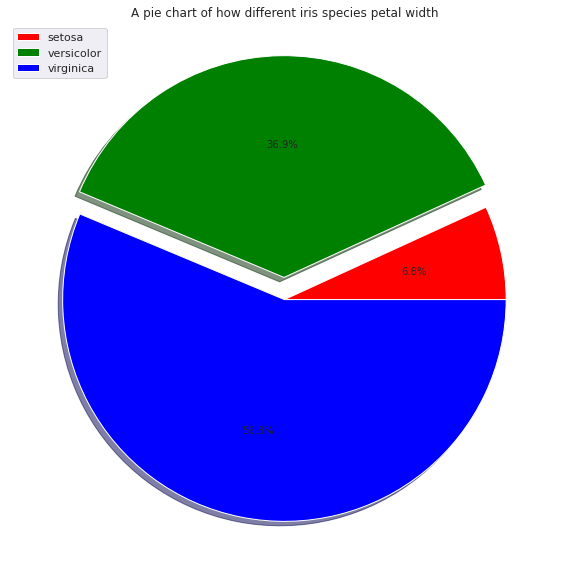

In [8]:
explode = (0,0.1,0)
labels = iris_pie["species"]
colors = ["red", "green", "blue"]
plt.figure(figsize = (14,8))
plt.pie(iris_pie["petal_width"], explode = explode, colors = colors, shadow = True, autopct = "%.1f%%")
plt.legend(labels, loc = "upper left")
plt.tight_layout()
plt.title("A pie chart of how different iris species petal width")
plt.show();

### CLUSTERING

In [9]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [10]:
kmeans = KMeans(n_clusters = 3)

#### Sample Clustering with iris

In [11]:
iris_df = iris.iloc[:,:4]

In [12]:
kmeans.fit_predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [13]:
iris_df["label"] = kmeans.labels_

In [14]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


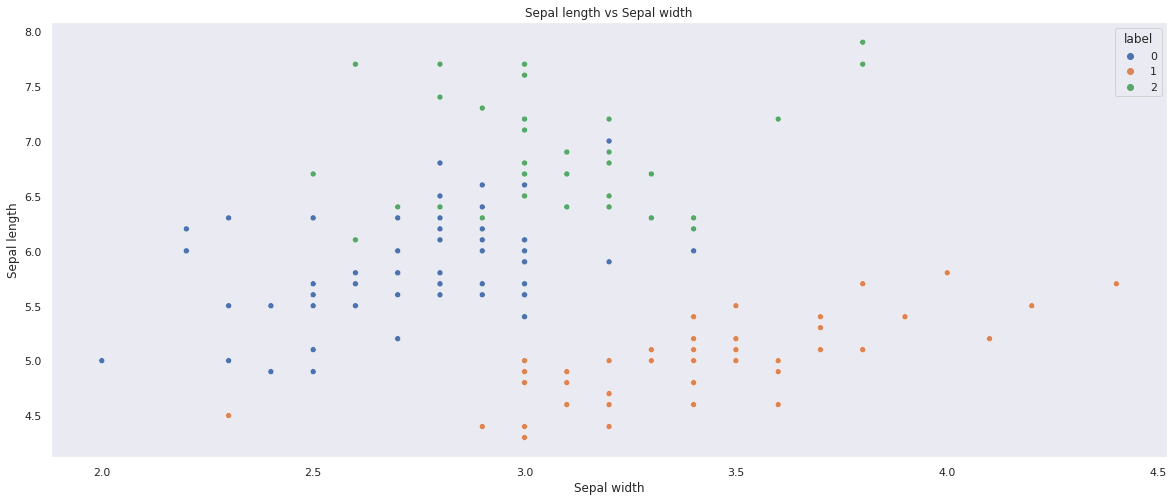

In [15]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "sepal_width", y = "sepal_length", data = iris_df, hue = "label", palette = "deep")
plt.title("Sepal length vs Sepal width")
plt.xlabel("Sepal width")
plt.ylabel("Sepal length")
plt.show()

In [16]:
kmeans.inertia_

78.851441426146

#### Clustering the goodreads book dataset

In [17]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='books - books.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)



In [18]:
books = df_data_1.copy()

In [19]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964,NaN


In [20]:
books.drop("Unnamed: 10", axis = 1, inplace = True)

In [21]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [22]:
books.shape

(13719, 10)

In [23]:
books_new = books.iloc[:,[1,3,7,8,9]]

In [24]:
books_new.head()

,title,average_rating,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,4.56,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,4.49,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,4.47,320,5629932,70390
3,Harry Potter and the Chamber of Secrets (Harry...,4.41,352,6267,272
4,Harry Potter and the Prisoner of Azkaban (Harr...,4.55,435,2149872,33964


In [25]:
books_df = books_new.iloc[:,1:]

In [26]:
books_df = books_df[pd.to_numeric(books_df['average_rating'], errors='coerce').notnull()]

In [27]:
books_df = books_df.reset_index()

In [28]:
books_df["average_rating"] = books_df["average_rating"].astype(float)
books_df["# num_pages"] = books_df["# num_pages"].astype(int)

In [29]:
def KMeans_plot(df):
    n_cluster = np.arange(2,11)
    inertia = []
    for i in n_cluster:
        kmeans = KMeans(n_clusters = i)
        kmeans.fit_predict(df)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize = (16,10))
    plt.plot(n_cluster, inertia, 'bo-')
    plt.xlabel("No of clusters")
    plt.ylabel("Inertia")

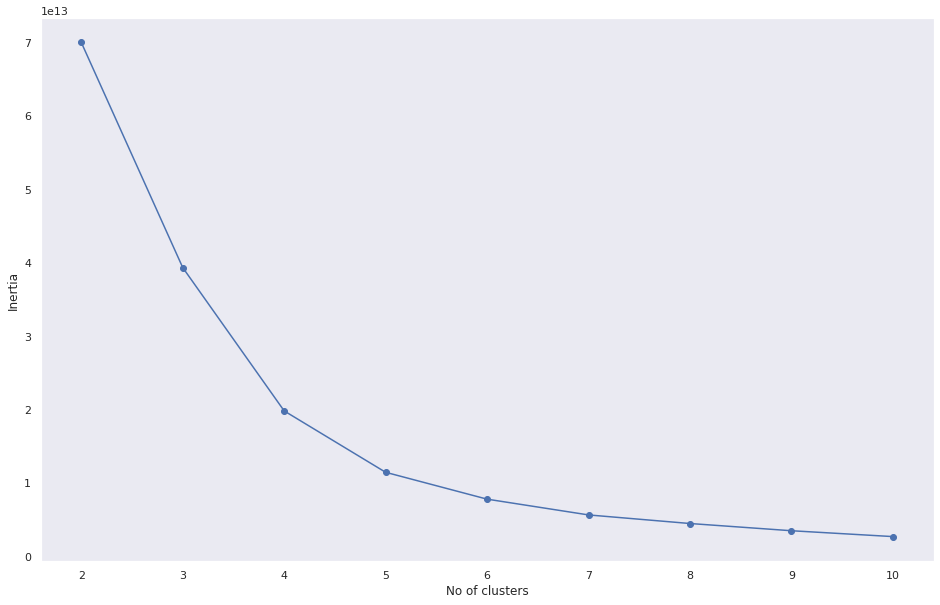

In [30]:
KMeans_plot(books_df)

In [31]:
books_df.drop("index", axis = 1, inplace = True)

In [32]:
kmeans_book = KMeans(n_clusters = 4)
kmeans_book.fit_predict(books_df)

array([1, 1, 3, ..., 0, 0, 0], dtype=int32)

In [33]:
books_df["label"] = kmeans_book.labels_

In [34]:
books_df.head()

,average_rating,# num_pages,ratings_count,text_reviews_count,label
0,4.56,652,1944099,26249,1
1,4.49,870,1996446,27613,1
2,4.47,320,5629932,70390,3
3,4.41,352,6267,272,0
4,4.55,435,2149872,33964,1


In [35]:
kmeans_book.cluster_centers_

array([[3.92915361e+00, 3.41812167e+02, 8.56823847e+03, 3.30067637e+02],
       [4.10148148e+00, 3.86111111e+02, 1.66806863e+06, 3.15055185e+04],
       [4.02630573e+00, 3.84923567e+02, 4.62983452e+05, 1.17096688e+04],
       [4.03000000e+00, 4.09000000e+02, 4.99863650e+06, 8.20045000e+04]])

In [36]:
kmeans_book.inertia_

19580615957321.24

### Clustering for preprocessing

In [37]:

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='winequality-red.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)


In [38]:
wine = df_data_2.copy()

In [39]:
wine.head()

,Index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
wine.drop("Index", axis = 1, inplace = True)

In [41]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [42]:
wine["label"] = (wine["quality"] >= 5.5).astype(int)

In [43]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
pipeline = Pipeline([("kmeans", KMeans(n_clusters = 2)), ("dec", DecisionTreeClassifier())])

In [46]:
x, y = wine[["volatile acidity", "citric acid", "chlorides", "pH", "sulphates", "alcohol"]], wine.iloc[:, 12]

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, train_size = 0.8)

In [48]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=2)),
                ('dec', DecisionTreeClassifier())])

In [49]:
pipeline.score(x_test, y_test)

0.74375

In [50]:
pipeline["kmeans"].cluster_centers_

array([[ 0.4836105 ,  0.30870897,  0.07791685,  3.33774617,  0.67962801,
        11.5833698 ],
       [ 0.54830292,  0.25250608,  0.09421046,  3.29255474,  0.64984185,
         9.74103812]])

In [51]:
y_pred = pipeline.predict(x_test)

In [52]:
x_test_new = x_test.copy()
x_test_new["quality"] = y_test
x_test_new["predicted quality"] = y_pred

In [53]:
x_test_new.head()

,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol,quality,predicted quality
1518,0.47,0.46,0.114,3.32,0.63,10.5,0,0
1246,0.74,0.07,0.086,3.12,0.48,10.0,0,0
544,0.31,0.74,0.075,2.86,0.79,8.4,1,0
1343,0.51,0.02,0.084,3.36,0.54,10.5,1,1
428,0.52,0.33,0.070,3.24,0.60,9.3,0,0


In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

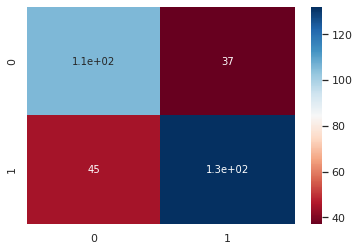

In [55]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [56]:
precision_score(y_test, y_pred)

0.7810650887573964

In [57]:
recall_score(y_test, y_pred)

0.7457627118644068

In [58]:
f1_score(y_test, y_pred)

0.7630057803468209

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.74375